## The second assignment: ResNet50 pretrain model in fruits classification

- This notebook was running in colab

### 1、 build the MMPretrain environment

In [ ]:
!pip install -U openmim
!git clone https://github.com/open-mmlab/mmpretrain.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.0 MB/s eta 0:00:00
Cloning into 'mmpretrain'...
remote: Enumerating objects: 16733, done.
remote: Counting objects: 100% (1564/1564), done.
remote: Compressing objects: 100% (663/663), done.
remote: Total 16733 (delta 979), reused 1331 (delta 882), pack-reused 15169
Receiving objects: 100% (16733/16733), 13.27 MiB | 20.55 MiB/s, done.
Resolving deltas: 100% (11619/11619), done.


In [ ]:
import os
os.chdir("mmpretrain")
!pwd

/content/mmpretrain


In [ ]:
!mim install -e ".[multimodal]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Obtaining file:///content/mmpretrain
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.3 MB/s eta 0:00:00
  Running setup.py develop for mmpretrain


In [ ]:
import mmpretrain
mmpretrain.__version__

'1.0.0rc8'

### 2、Upload our dataset to mmpretrain/data and Unzip it

In [ ]:
!mkdir data

In [ ]:
!gdown --id "1mdBfo8tCX0OoIP_h0OI9_FMLiD-2pNg2" -O data/fruit30.tar

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mdBfo8tCX0OoIP_h0OI9_FMLiD-2pNg2
To: /content/mmpretrain/data/fruit30.tar
100% 187M/187M [00:05<00:00, 32.4MB/s]


In [ ]:
import os
os.chdir("data")
!tar -xf fruit30.tar
!rm -rf fruit30.tar

### 3、Training preparation：config and pretrain model

In [ ]:
os.chdir("/content/mmpretrain")
from mmpretrain import list_models, get_model, inference_model

list_models(task = 'Image Classification', pattern = 'resnet50')

# we use 'resnet50_8xb32-fp16_in1k'

['resnet50_8xb16_cifar10',
 'resnet50_8xb16_cifar100',
 'resnet50_8xb256-rsb-a1-600e_in1k',
 'resnet50_8xb256-rsb-a2-300e_in1k',
 'resnet50_8xb256-rsb-a3-100e_in1k',
 'resnet50_8xb32-fp16_in1k',
 'resnet50_8xb32_in1k',
 'resnet50_8xb8_cub',
 'resnet50_barlowtwins-pre_8xb32-linear-coslr-100e_in1k',
 'resnet50_byol-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_densecl-pre_8xb32-linear-steplr-100e_in1k',
 'resnet50_mocov2-pre_8xb32-linear-steplr-100e_in1k',
 'resnet50_mocov3-100e-pre_8xb128-linear-coslr-90e_in1k',
 'resnet50_mocov3-300e-pre_8xb128-linear-coslr-90e_in1k',
 'resnet50_mocov3-800e-pre_8xb128-linear-coslr-90e_in1k',
 'resnet50_simclr-200e-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_simclr-800e-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_simsiam-100e-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_simsiam-200e-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_swav-pre_8xb32-linear-coslr-100e_in1k']

In [ ]:
# do this we will get a config file and then just modify it
!mim train mmpretrain resnet50_8xb32-fp16_in1k.py --work-dir=outputs

The path resnet50_8xb32-fp16_in1k.py doesn't exist but we find the config file in codebase mmpretrain, will use /content/mmpretrain/configs/resnet/resnet50_8xb32-fp16_in1k.py instead.
Training command is /usr/bin/python3 /content/mmpretrain/mmpretrain/.mim/tools/train.py /content/mmpretrain/configs/resnet/resnet50_8xb32-fp16_in1k.py --launcher none --work-dir=outputs. 
06/07 01:22:54 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1278812529
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 

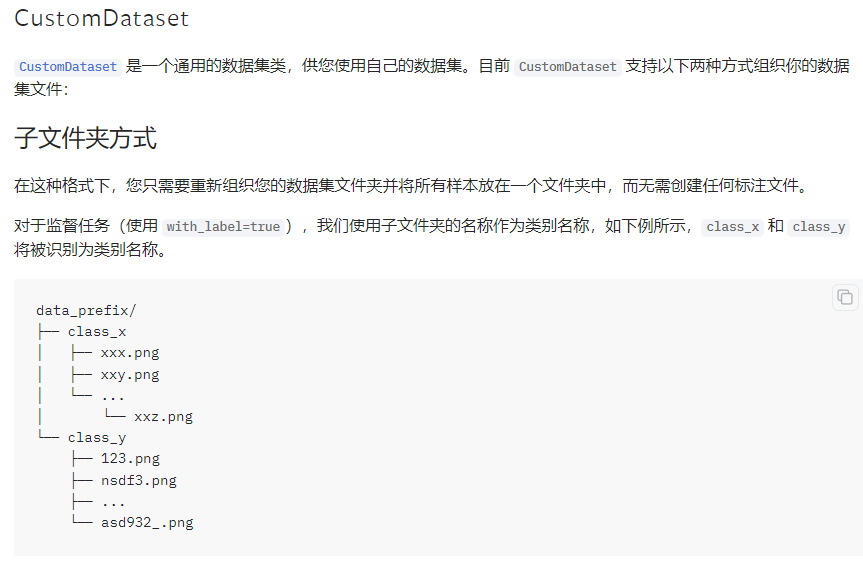

we use this simple way to change the customdataset, and now I show my config file(also rename the class folders, we cant show chinese on the results)

In [ ]:
model = dict(
    type='ImageClassifier',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(3, ),
        style='pytorch'),
    neck=dict(type='GlobalAveragePooling'),
    head=dict(
        type='LinearClsHead',
        num_classes=30,
        in_channels=2048,
        loss=dict(type='CrossEntropyLoss', loss_weight=1.0),
        topk=1),
    init_cfg=dict(
        type='Pretrained',
        checkpoint=
        'https://download.openmmlab.com/mmclassification/v0/fp16/resnet50_batch256_fp16_imagenet_20210320-b3964210.pth'
    ))
dataset_type = 'CustomDataset'
data_preprocessor = dict(
    num_classes=1000,
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='RandomResizedCrop', scale=224),
    dict(type='RandomFlip', prob=0.5, direction='horizontal'),
    dict(type='PackInputs')
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='ResizeEdge', scale=256, edge='short'),
    dict(type='CenterCrop', crop_size=224),
    dict(type='PackInputs')
]
train_dataloader = dict(
    pin_memory=True,
    persistent_workers=True,
    collate_fn=dict(type='default_collate'),
    batch_size=32,
    num_workers=2,
    dataset=dict(
        type='CustomDataset',
        data_root='data',
        with_label=True,
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='RandomResizedCrop', scale=224),
            dict(type='RandomFlip', prob=0.5, direction='horizontal'),
            dict(type='PackInputs')
        ]),
    sampler=dict(type='DefaultSampler', shuffle=True))
val_dataloader = dict(
    pin_memory=True,
    persistent_workers=True,
    collate_fn=dict(type='default_collate'),
    batch_size=32,
    num_workers=2,
    dataset=dict(
        type='CustomDataset',
        data_root='data',
        with_label=True,
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='ResizeEdge', scale=256, edge='short'),
            dict(type='CenterCrop', crop_size=224),
            dict(type='PackInputs')
        ]),
    sampler=dict(type='DefaultSampler', shuffle=False))
val_evaluator = dict(type='Accuracy', topk=1)
test_dataloader = dict(
    pin_memory=True,
    persistent_workers=True,
    collate_fn=dict(type='default_collate'),
    batch_size=32,
    num_workers=2,
    dataset=dict(
        type='CustomDataset',
        data_root='data',
        with_label=True,
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='ResizeEdge', scale=256, edge='short'),
            dict(type='CenterCrop', crop_size=224),
            dict(type='PackInputs')
        ]),
    sampler=dict(type='DefaultSampler', shuffle=False))
test_evaluator = dict(type='Accuracy', topk=1)
optim_wrapper = dict(
    optimizer=dict(type='SGD', lr=0.01, momentum=0.9, weight_decay=0.0001),
    type='AmpOptimWrapper',
    loss_scale=512.0)
param_scheduler = dict(
    type='MultiStepLR', by_epoch=True, milestones=[30, 60, 90], gamma=0.1)
train_cfg = dict(by_epoch=True, max_epochs=10, val_interval=1)
val_cfg = dict()
test_cfg = dict()
default_scope = 'mmpretrain'
default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=100),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(
        type='CheckpointHook', interval=1, max_keep_ckpts=1, save_best='auto'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    visualization=dict(type='VisualizationHook', enable=False))
env_cfg = dict(
    cudnn_benchmark=False,
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),
    dist_cfg=dict(backend='nccl'))
vis_backends = [dict(type='LocalVisBackend')]
visualizer = dict(
    type='UniversalVisualizer', vis_backends=[dict(type='LocalVisBackend')])
log_level = 'INFO'
load_from = None
resume = False
randomness = dict(seed=None, deterministic=False)
launcher = 'none'
work_dir = 'outputs'


- **train again**

In [19]:
!mim train mmpretrain outputs/resnet50_8xb32-fp16_in1k.py

Training command is /usr/bin/python3 /content/mmpretrain/mmpretrain/.mim/tools/train.py outputs/resnet50_8xb32-fp16_in1k.py --launcher none. 
06/07 02:01:57 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1201483664
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled


- **testing**

In [20]:
!mim test mmpretrain outputs/resnet50_8xb32-fp16_in1k.py --checkpoint outputs/best_accuracy_top1_epoch_9.pth

Testing command is /usr/bin/python3 /content/mmpretrain/mmpretrain/.mim/tools/test.py outputs/resnet50_8xb32-fp16_in1k.py outputs/best_accuracy_top1_epoch_9.pth --launcher none. 
06/07 02:11:58 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 617693461
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually pro

- **Inference**

In [21]:
from mmpretrain import ImageClassificationInferencer
inferencer = ImageClassificationInferencer('outputs/resnet50_8xb32-fp16_in1k.py', 'outputs/best_accuracy_top1_epoch_9.pth')
inferencer('outputs/test.jpeg', show_dir="./visualize/")  # show the prediction

Loads checkpoint by local backend from path: outputs/best_accuracy_top1_epoch_9.pth


Output()

06/07 02:13:53 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


[{'pred_scores': array([2.8612230e-17, 7.7700131e-11, 3.1285166e-13, 5.3259496e-13,
         4.2840067e-12, 9.9999976e-01, 2.7415903e-09, 1.0688864e-12,
         6.5722616e-15, 5.8755340e-16, 7.0885392e-10, 6.2857055e-14,
         3.5385377e-15, 1.0395895e-11, 1.6721872e-09, 9.8559763e-15,
         9.2293589e-10, 2.8291110e-15, 4.5254430e-12, 3.0936892e-14,
         2.1635428e-12, 1.2084144e-09, 3.3458493e-13, 2.1231785e-11,
         2.6058129e-07, 4.9640259e-10, 7.8860307e-13, 5.7031531e-09,
         1.4511520e-12, 1.3561686e-13], dtype=float32),
  'pred_label': 5,
  'pred_score': 0.9999997615814209,
  'pred_class': 'cherry'}]

Hami melon 哈密瓜

cherry tomato 圣女果

mangosteen 山竹

Yangmei 杨梅

pomelo 柚子

lemon 柠檬

longan 桂圆

pear 梨

coconut 椰子

durian 榴莲

pitaya 火龙果

kiwis 猕猴桃

pomegranate 石榴

tangerine 砂糖橘

carrot 胡萝卜

navel orange 脐橙

mango 芒果

bitter gourd 苦瓜

green apple 青苹果

red apple 红苹果

strawberry 草莓

litchi 荔枝

pineapple 菠萝

White Grape 白葡萄

red grape 红葡萄

watermelon 西瓜

tomato 西红柿

cherry 车厘子

banana 香蕉

cucumber 黄瓜

### 4、Conclusion：this task is very simple, so we dont have to test too mush pictures which in different types

In [23]:
!mim run mmpretrain confusion_matrix outputs/resnet50_8xb32-fp16_in1k.py outputs/best_accuracy_top1_epoch_9.pth --show-path visualize

Use the script /content/mmpretrain/mmpretrain/.mim/tools/analysis_tools/confusion_matrix.py for command confusion_matrix.
The command to call is /usr/bin/python3 /content/mmpretrain/mmpretrain/.mim/tools/analysis_tools/confusion_matrix.py outputs/resnet50_8xb32-fp16_in1k.py outputs/best_accuracy_top1_epoch_9.pth --show-path visualize. 
06/07 02:20:44 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1616594618
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture appli